In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score
from sklearn.neighbors import KNeighborsClassifier
import time

In [60]:
df = pd.read_csv("cleaned_data_discreet.csv")
df.drop(["Unnamed: 0"], axis = 1,inplace = True)
columns = df.columns
df.head()


,Number of Bachelor's Degrees,Percent Financial Aid,Average Amount of Aid,Retention Rate,Enrollment,Percent Women,Percent In State,Percent Out of State,Percent Foreign,Percent Unknown,Graduation Rate,Percent Awarded,Total Staff,Instructional Staff,SA Staff,Librarian Staff,Percent Books,Percent Digital,Percent Admitted,Total Price
0,208.0,100.0,32400.0,79.0,996,99.0,59.0,36.0,4.0,0.0,69.0,66.0,357.0,105.0,56.0,62.0,41,12,70.0,"50,000-60,000"
1,310.0,100.0,40855.0,75.0,1533,54.0,66.0,32.0,1.0,0.0,64.0,61.0,435.0,132.0,21.0,27.0,37,54,68.0,"50,000-60,000"
2,398.0,100.0,39796.0,68.0,1912,60.0,53.0,46.0,1.0,0.0,51.0,48.0,355.0,123.0,17.0,21.0,28,13,62.0,"60,000-70,000"
3,382.0,100.0,38689.0,82.0,1771,56.0,50.0,45.0,4.0,0.0,74.0,70.0,426.0,160.0,41.0,50.0,27,46,64.0,"60,000-70,000"
4,61.0,97.0,10055.0,37.0,698,45.0,64.0,34.0,0.0,2.0,31.0,10.0,115.0,41.0,4.0,7.0,20,76,64.0,"20,000-30,000"


In [82]:
x = df[["Average Amount of Aid", "Percent Financial Aid", "Percent Awarded", "Total Staff",
        "Graduation Rate", "Percent Admitted", "Number of Bachelor's Degrees"]]
y = df['Total Price']
print(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle = True)
#print(y_train)

0      50,000-60,000
1      50,000-60,000
2      60,000-70,000
3      60,000-70,000
4      20,000-30,000
           ...      
220    20,000-30,000
221    70,000-80,000
222    50,000-60,000
223    60,000-70,000
224    40,000-50,000
Name: Total Price, Length: 225, dtype: object


In [83]:
# Standardize the features:
scaler = PowerTransformer()
#scaler = StandardScaler()
#scaler = MaxAbsScaler()
#scaler = RobustScaler()
scaler.fit(x_train)
X_train_std = scaler.transform(x_train)
X_test_std = scaler.transform(x_test)

#print(x_train, y_train)


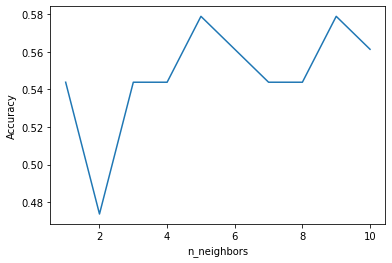

In [84]:
num_K = [i for i in range (1,11)]
acc = []
prec = []

for k in num_K:
    model = KNeighborsClassifier(n_neighbors = k, p = 2)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    #print(y_pred)
    acc.append(accuracy_score(y_test, y_pred))
    #prec.append(precision_score(y_test, y_pred))
    
plt.plot(num_K, acc)
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.show()
#plt.plot(num_K, prec, label = "Precision")

KNN Accuracy: 0.49122807017543857
KNN Accuracy: 0.5087719298245614
KNN Accuracy: 0.49122807017543857
KNN Accuracy: 0.5263157894736842
KNN Accuracy: 0.47368421052631576
KNN Accuracy: 0.42105263157894735
KNN Accuracy: 0.42105263157894735


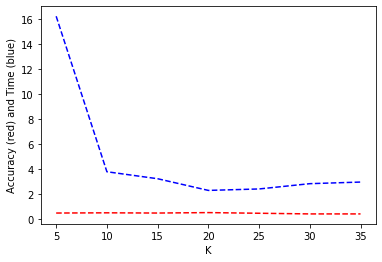

In [85]:
# K-nearest neighbors
knn_k = [5, 10, 15, 20, 25, 30, 35]
res_pred = []
res_times = []
for i in knn_k:
    t_b = time.perf_counter()
    knn = KNeighborsClassifier(n_neighbors=i, metric='manhattan', weights='distance')
    knn.fit(X_train_std, y_train)
    y_pred = knn.predict(X_test_std)
    res_pred.append(accuracy_score(y_test, y_pred))
    t_e = time.perf_counter()
    res_times.append((t_e - t_b)*1000)
    print("KNN Accuracy: {}".format(accuracy_score(y_test, y_pred)))
plt.plot(knn_k, res_pred, 'r--', knn_k, res_times, 'b--')
plt.xlabel('K')
plt.ylabel('Accuracy (red) and Time (blue)')
plt.show()